# >>>> Term_Deposit_Prediction <<<<


## Project overview:

Banks frequently use telephonic marketing campaigns to promote financial products like term deposits. Despite being one of the most effective ways to reach potential customers, these campaigns require significant investment in terms of call center operations and personnel. Given the high costs, it is essential to optimize the targeting strategy to focus on individuals most likely to subscribe to a term deposit.

By leveraging machine learning, banks can build predictive models that analyze historical customer data, including demographic details, past interactions, account information, and behavioral patterns. The goal is to predict whether a customer will subscribe to a term deposit based on various influencing factors. This approach enables banks to increase conversion rates, reduce operational costs, and improve overall campaign efficiency.

The model will utilize customer-related attributes such as age, job type, marital status, existing bank balance, previous marketing interactions, and economic indicators to determine the likelihood of subscription. By employing techniques like logistic regression, decision trees, or ensemble learning methods, the model will help banks prioritize high-potential leads, leading to more effective and data-driven marketing decisions.

## Project objective:

The primary objective of this project is to enhance the efficiency and profitability of the bank’s telephonic marketing campaigns by identifying potential customers who are most likely to subscribe to a term deposit. Since these campaigns require substantial investments in manpower and resources, it is crucial to optimize the targeting strategy to improve conversion rates while reducing operational costs.

The bank needs to make data-driven decisions based on customer profiles, including demographic details, financial background, past interactions, and behavioral attributes, to maximize returns. The dataset contains multiple features that can help classify potential customers based on their likelihood of subscribing to a term deposit.

In this project, we will leverage exploratory data analysis (EDA) to understand the data, uncover patterns, and identify key factors influencing customer decisions. By applying machine learning techniques, we aim to build a predictive model that enables the bank to focus its marketing efforts on high-potential leads, thereby improving campaign effectiveness and overall profitability.

## Section 1
**1. Why is your proposal important in today’s world? How predicting potential term deposit subscribers is valuable for a bank?**

In today’s highly competitive banking sector, targeted marketing is crucial to optimize resources and maximize returns. Telephonic marketing campaigns, while effective, require substantial investments in manpower and infrastructure. This proposal aims to leverage machine learning to identify customers most likely to subscribe to a term deposit, making marketing efforts more efficient and impactful. Here’s why predicting potential subscribers is valuable for a bank:

**Optimized Marketing Strategy** --> Banks can reduce the cost of telemarketing by focusing on high-potential customers, ensuring that resources are spent wisely.

**Increased Conversion Rates** --> Predictive models help identify customers more inclined to invest in term deposits, leading to higher success rates in marketing campaigns.

**Enhanced Customer Experience** --> Instead of bombarding all customers with marketing calls, banks can approach only those who are genuinely interested, improving customer satisfaction.

**Higher Profitability** --> By increasing the efficiency of term deposit campaigns, banks can boost deposit volumes, leading to more capital for lending and investment.

**Competitive Advantage** --> Banks that use data-driven insights can outperform competitors by personalizing their marketing strategies and achieving better customer engagement.

**Data-Driven Decision-Making** --> The adoption of machine learning aligns with the global shift toward data-driven banking, allowing institutions to make informed marketing decisions.

By predicting potential term deposit subscribers, banks can significantly enhance marketing efficiency, reduce costs, and improve customer engagement, ultimately increasing profitability.

**2. How is it going to impact the banking sector?**

Implementing predictive analytics for term deposit subscription prediction will have a transformative impact on the banking sector. It will allow banks to refine their marketing efforts, reduce unnecessary expenditures, and focus on customers who are more likely to respond positively to offers. Key impacts include:

**Cost Reduction** --> Targeted telemarketing reduces expenses associated with large-scale, untargeted calling campaigns.

**Improved Customer Relationships** --> Customers receive offers that are relevant to their financial goals, enhancing their trust in the bank.

**Increased Deposits and Liquidity** --> More successful term deposit subscriptions lead to higher liquidity, which banks can use for lending and investments.

**Data-Driven Financial Services** --> Banks leveraging predictive analytics gain deeper insights into customer behavior, helping tailor future financial products and services.

**Regulatory Compliance & Ethical Marketing** --> By reaching out to only relevant customers, banks can avoid unnecessary disturbances and ensure ethical marketing practices.

Ultimately, this proposal will not only increase revenue for banks but also contribute to a more efficient and customer-centric financial ecosystem.

**3. What are the knowledge gaps, and how can the proposed method be useful for banks in India in the future?**

While the proposed method offers numerous advantages, certain knowledge gaps and challenges must be addressed for effective implementation in Indian banks:

**Data Availability & Quality** --> Customer data in India may be fragmented across different banks and financial institutions. Ensuring access to clean, comprehensive data is crucial for model accuracy.

**Changing Customer Behavior** --> Economic conditions and customer preferences change over time. The model needs continuous updates to stay relevant.
Regulatory Challenges: India’s financial sector is governed by strict data privacy and banking regulations. The predictive model must align with guidelines set by the RBI and other regulatory bodies.

**Digital vs. Non-Digital Customers** --> A significant portion of the Indian population still relies on traditional banking methods. The model must accommodate both digital-savvy and traditional customers to maximize its impact.

**Scalability & Adaptability** --> Different banks have different customer demographics and financial products. The model should be flexible enough to be customized for various banking institutions.

In the future, as more Indian banks adopt AI and data analytics, predictive models will become essential tools for optimizing marketing efforts, enhancing financial planning, and improving overall banking efficiency. Addressing the above gaps will ensure that such models contribute meaningfully to India’s growing banking sector.


## Section 2: Initial Hypotheses
The initial hypotheses focus on identifying key patterns and features that impact the machine learning (ML) model’s ability to predict whether a customer will subscribe to a term deposit.

**Hypothesis 1: Past Campaign Influence** → Customers who have previously subscribed to a term deposit after a marketing campaign are more likely to subscribe again.

**Hypothesis 2: Employment Status** → Customers with stable employment (e.g., government or private sector jobs) are more likely to subscribe to a term deposit compared to self-employed or unemployed individuals.

**Hypothesis 3: Age Factor** → Middle-aged customers (30-60 years old) are more likely to invest in term deposits as they focus on financial security and savings.

**Hypothesis 4: Contact Duration Impact** → Longer call durations during telemarketing campaigns indicate higher engagement and may increase the likelihood of subscription.

**Hypothesis 5: Economic Conditions** → Customers are more likely to invest in a term deposit when interest rates are favorable and economic conditions are stable.

**Hypothesis 6: Previous Loan Status** → Customers without outstanding loans may have higher disposable income, making them more likely to opt for a term deposit.

These hypotheses provide a structured approach for data exploration and feature selection, helping to refine the ML model for accurate predictions.

In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [525]:
pd.set_option('display.max_columns',None)

## >>>Import DataSet<<<

In [526]:
data = pd.read_excel(r'train.xlsx')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## >>>Basic Data Exploration & EDA<<<

In [527]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [528]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [529]:
data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [530]:
data['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

<Axes: xlabel='None', ylabel='age'>

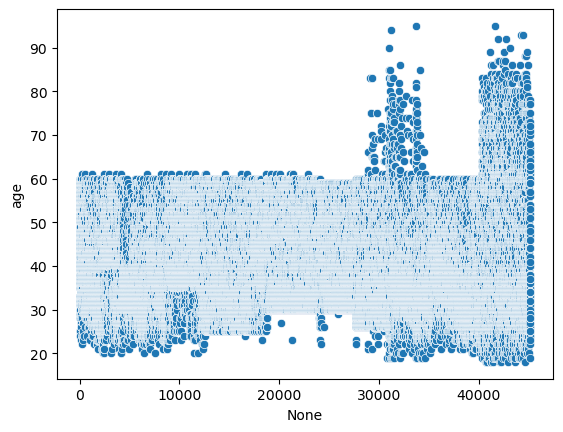

In [531]:
sns.scatterplot(data = data, y= 'age', x=data['age'].index)

In [532]:
data['age'].quantile(0.01)

23.0

In [533]:
data.loc[data['age'] < data['age'].quantile(0.01),'age'] = data['age'].quantile(0.01)

In [534]:
data.loc[data['age'] > data['age'].quantile(0.99),'age'] = data['age'].quantile(0.99)

In [535]:
data['age'].describe()

count    45211.000000
mean        40.887660
std         10.384267
min         23.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         71.000000
Name: age, dtype: float64

In [536]:
data['job'].unique()   ## 12 values

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

([<matplotlib.patches.Wedge at 0x20cd8981760>,
 [Text(0.8579171229478321, 0.6884607542575791, 'blue-collar'),
  Text(-0.46745516060273884, 0.9957337359082837, 'management'),
  Text(-1.0984421363087038, -0.058522416060610045, 'technician'),
  Text(-0.6483742631823141, -0.8886004810052669, 'admin.'),
  Text(0.019375584319636995, -1.0998293443676945, 'services'),
  Text(0.4918732509391826, -0.9839007597367329, 'retired'),
  Text(0.7340685906572577, -0.8192333637068671, 'self-employed'),
  Text(0.8906908427227288, -0.6454996690083392, 'entrepreneur'),
  Text(0.9983650714477644, -0.4618086011683849, 'unemployed'),
  Text(1.063999032524936, -0.279116568454831, 'housemaid'),
  Text(1.0939182993734373, -0.11551084059916929, 'student'),
  Text(1.0997797362289914, -0.022012082593211454, 'unknown')],
 [Text(0.46795479433518106, 0.37552404777686127, '21.53%'),
  Text(-0.2549755421469484, 0.5431274923136092, '20.92%'),
  Text(-0.5991502561683838, -0.03192131785124184, '16.80%'),
  Text(-0.353658689

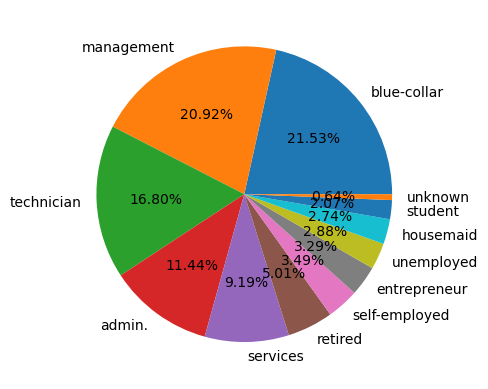

In [537]:
val = data['job'].value_counts()    ## club values < 5% such that combined values are < 10%.
labl =  data['job'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [538]:
data.loc[data['job'].isin(['self-employed','entrepreneur','unknown']), 'job'] = 'other1'
data.loc[data['job'].isin(['unemployed', 'housemaid', 'student']), 'job'] = 'other2'

In [539]:
job_data = pd.get_dummies(data['job'], prefix = 'job')

data.drop(['job'],axis = 1,inplace=True)

data = pd.concat([data,job_data],axis=1)

In [540]:
job_data.dtypes

job_admin.         bool
job_blue-collar    bool
job_management     bool
job_other1         bool
job_other2         bool
job_retired        bool
job_services       bool
job_technician     bool
dtype: object

([<matplotlib.patches.Wedge at 0x20cd5c64b90>,
 [Text(-0.34626600924200074, 1.0440784696772647, 'married'),
  Text(-0.04573369023536169, -1.099048874972108, 'single'),
  Text(1.028779331933144, -0.38937525112312166, 'divorced')],
 [Text(-0.1888723686774549, 0.5694973470966898, '60.19%'),
  Text(-0.024945649219288192, -0.5994812045302407, '28.29%'),
  Text(0.5611523628726239, -0.2123865006126118, '11.52%')])

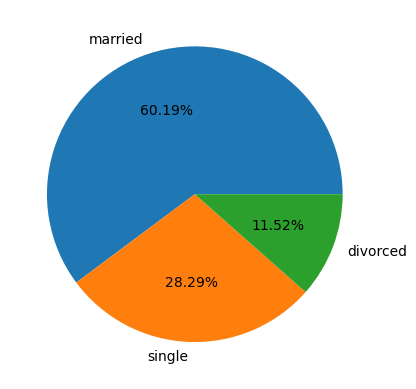

In [541]:
val = data['marital'].value_counts()    ## create dummyies
labl =  data['marital'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [542]:
marital_data = pd.get_dummies(data['marital'],prefix = 'marital')

data.drop(columns = 'marital', inplace = True)

data = pd.concat([data,marital_data], axis = 1)

([<matplotlib.patches.Wedge at 0x20cd5ab4ec0>,
 [Text(-0.04558098562748042, 1.0990552186988731, 'secondary'),
  Text(-0.5876997095948636, -0.9298435628330785, 'tertiary'),
  Text(0.8166522528681857, -0.7369390055393439, 'primary'),
  Text(1.0908547224334193, -0.1415484883165761, 'unknown')],
 [Text(-0.024862355796807498, 0.5994846647448397, '51.32%'),
  Text(-0.3205634779608347, -0.5071873979089518, '29.42%'),
  Text(0.44544668338264665, -0.4019667302941875, '15.15%'),
  Text(0.595011666781865, -0.07720826635449606, '4.11%')])

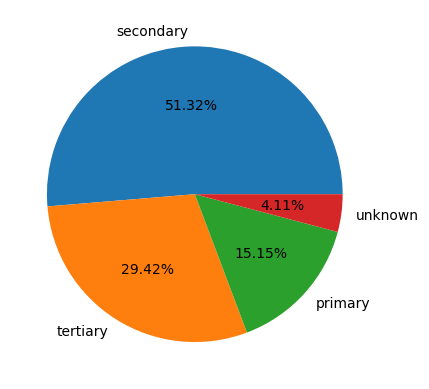

In [543]:
val = data['education'].value_counts()    ## create dummyies
labl =  data['education'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [544]:
 data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [545]:
edu_data = pd.get_dummies(data['education'], prefix = 'edu')

data.drop(['education'],axis = 1, inplace = True)

data = pd.concat([data,edu_data], axis = 1)

([<matplotlib.patches.Wedge at 0x20cd45e93a0>,
 [Text(-1.0982365078199707, 0.062262130475881854, 'no'),
  Text(1.0982365070912954, -0.062262143328922194, 'yes')],
 [Text(-0.5990380951745294, 0.03396116207775374, '98.20%'),
  Text(0.5990380947770702, -0.03396116908850301, '1.80%')])

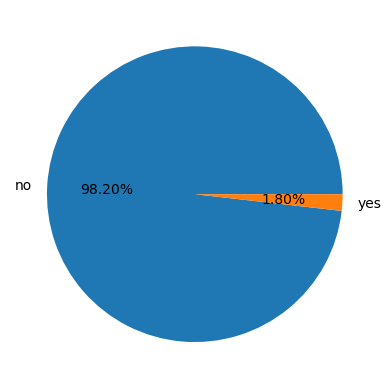

In [546]:
val = data['default'].value_counts()    ## we can drop this colum since there is no varience
labl =  data['default'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [547]:
data.drop(['default'],axis = 1, inplace = True)

In [548]:
data['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='None', ylabel='balance'>

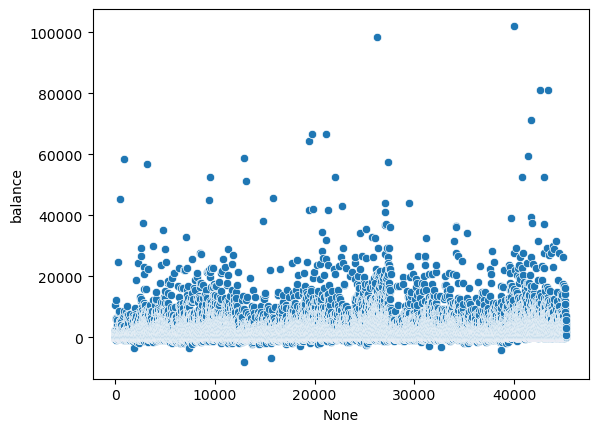

In [549]:
sns.scatterplot(data = data, y=data['balance'] , x=data['balance'].index)

In [550]:
data['balance'].quantile(0.99)   # 5. outlier treatment by capping at 99 percentile

13164.900000000001

In [551]:
data.loc[data['balance'] > 13165, 'balance'] = 13165

In [552]:
data['balance'].quantile(0.01) # outlier treatment by capping at 1 percentile

-627.0

In [553]:
data.loc[data['balance'] < -627, 'balance' ] = -627 

([<matplotlib.patches.Wedge at 0x20cd5a99d90>,
 [Text(-0.19197472005325109, 1.0831185100719478, 'yes'),
  Text(0.1919747200532507, -1.0831185100719478, 'no')],
 [Text(-0.10471348366540967, 0.5907919145846987, '55.58%'),
  Text(0.10471348366540946, -0.5907919145846988, '44.42%')])

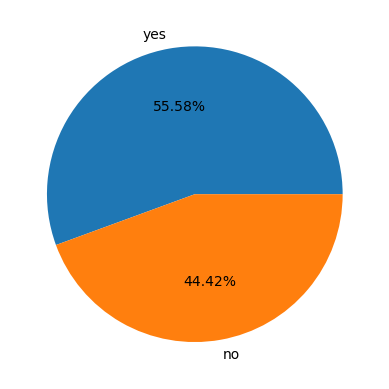

In [554]:
val = data['housing'].value_counts()    ## distribution is good
labl =  data['housing'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [555]:
data.loc[data['housing'] == 'yes', 'housing'] = 1
data.loc[data['housing'] == 'no', 'housing'] = 0

([<matplotlib.patches.Wedge at 0x20ce3763170>,
 [Text(-0.963560081603819, 0.5306147087479217, 'no'),
  Text(0.9635601312835493, -0.5306146185329135, 'yes')],
 [Text(-0.5255782263293558, 0.28942620477159364, '83.98%'),
  Text(0.5255782534273905, -0.28942615556340734, '16.02%')])

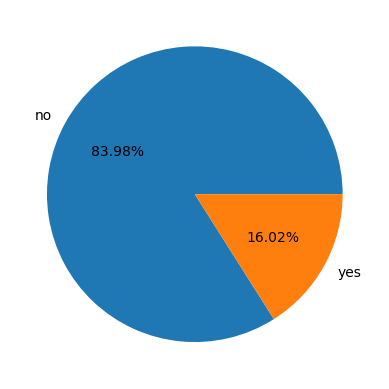

In [556]:
val = data['loan'].value_counts()    ## we can drop this colum since it is homogeneous 70-30 ratio for 2 values
labl =  data['loan'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [557]:
data.drop(['loan'], axis = 1, inplace = True)

([<matplotlib.patches.Wedge at 0x20ce36a9310>,
 [Text(-0.49242012255599776, 0.983627176780886, 'cellular'),
  Text(0.28513777604904644, -1.062401265374719, 'unknown'),
  Text(1.0776493911055374, -0.22061683945216995, 'telephone')],
 [Text(-0.2685927941214533, 0.536523914607756, '64.77%'),
  Text(0.15552969602675257, -0.5794915992953011, '28.80%'),
  Text(0.5878087587848385, -0.12033645788300176, '6.43%')])

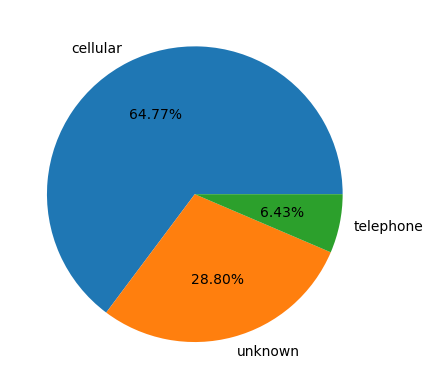

In [558]:
val = data['contact'].value_counts()    ## keep this column
labl =  data['contact'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [559]:
contact_data = pd.get_dummies(data['contact'], prefix = 'contact')

data.drop(['contact'], axis=1, inplace=True)

data = pd.concat([data,contact_data], axis=1)

In [560]:
data['day'].value_counts()

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

In [561]:
data['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [562]:
data['duration'].quantile(0.99)

1269.0

In [563]:
data.loc[data['duration'] >1269,'duration'] = 1269

In [564]:
data['duration'].quantile(0.01)

11.0

In [565]:
data.loc[data['duration'] < 11 ,'duration'] = 11

In [566]:
data['campaign'].describe()  ## 75% data is varying so we keep it

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [567]:
 data['campaign'].quantile(0.99)

16.0

In [568]:
data.loc[data['campaign'] > 16, 'campaign'] = 16

In [569]:
 data['campaign'].quantile(0.01)

1.0

In [570]:
data['pdays'].describe()  ## 75% data is same so we drop it

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [571]:
data.drop(['pdays'], axis=1, inplace=True)

In [572]:
data['previous'].describe()  ## drop it as 75% data is same

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [573]:
data.drop(['previous'], axis=1, inplace=True)

In [574]:
data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x20cd5ad9d90>,
 [Text(-0.9240617809661615, 0.5967493820337362, 'unknown'),
  Text(0.7614213758617784, -0.7938749828409738, 'failure'),
  Text(1.03781737909318, -0.36460264350682225, 'other'),
  Text(1.0939423617377162, -0.11528273589617713, 'success')],
 [Text(-0.5040336987088153, 0.3254996629274924, '81.75%'),
  Text(0.4153207504700609, -0.43302271791325836, '10.84%'),
  Text(0.5660822067780981, -0.19887416918553938, '4.07%'),
  Text(0.5966958336751179, -0.0628814923070057, '3.34%')])

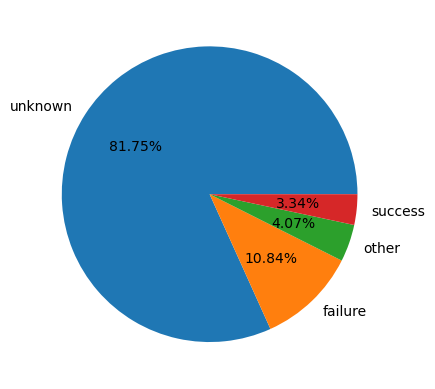

In [575]:
val = data['poutcome'].value_counts()    ## drop this column since no variance
labl =  data['poutcome'].value_counts().index
plt.pie(x = val, labels=labl, autopct = '%0.2f%%')

In [576]:
data.drop(['poutcome'], axis=1, inplace=True)

In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   balance            45211 non-null  int64 
 2   housing            45211 non-null  object
 3   day                45211 non-null  int64 
 4   month              45211 non-null  object
 5   duration           45211 non-null  int64 
 6   campaign           45211 non-null  int64 
 7   y                  45211 non-null  object
 8   job_admin.         45211 non-null  bool  
 9   job_blue-collar    45211 non-null  bool  
 10  job_management     45211 non-null  bool  
 11  job_other1         45211 non-null  bool  
 12  job_other2         45211 non-null  bool  
 13  job_retired        45211 non-null  bool  
 14  job_services       45211 non-null  bool  
 15  job_technician     45211 non-null  bool  
 16  marital_divorced   45211 non-null  bool 

In [578]:
bool_col = data.select_dtypes(include='bool' )
bool_col

,job_admin.,job_blue-collar,job_management,job_other1,job_other2,job_retired,job_services,job_technician,marital_divorced,marital_married,marital_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,contact_cellular,contact_telephone,contact_unknown
0,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True
4,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False
45207,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False
45208,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False
45209,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False


In [579]:
bool_col.columns

for i in bool_col.columns:
    data[i] = data[i].astype(int)

In [580]:
data.head()

,age,balance,housing,day,month,duration,campaign,y,job_admin.,job_blue-collar,job_management,job_other1,job_other2,job_retired,job_services,job_technician,marital_divorced,marital_married,marital_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,may,261,1,no,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,29,1,5,may,151,1,no,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
2,33,2,1,5,may,76,1,no,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,47,1506,1,5,may,92,1,no,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,33,1,0,5,may,198,1,no,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [581]:
data1 = data.copy(deep = True)

## >>>DATA TRANSFORMATION<<<

In [582]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [583]:
data.loc[data['month'].isin(['apr','may','jun']), 'month'] =  'Q1'
data.loc[data['month'].isin(['jul','aug','sep']), 'month'] =  'Q2'
data.loc[data['month'].isin(['oct','nov','dec']), 'month'] =  'Q3'
data.loc[data['month'].isin(['jan','feb','mar']), 'month'] =  'Q4'

In [584]:
month_col = pd.get_dummies(data['month'], prefix = 'month', dtype=int)

data.drop(['month'], axis =1, inplace = True)

data = pd.concat([data,month_col], axis = 1)

In [585]:
data

,age,balance,housing,day,duration,campaign,y,job_admin.,job_blue-collar,job_management,job_other1,job_other2,job_retired,job_services,job_technician,marital_divorced,marital_married,marital_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,contact_cellular,contact_telephone,contact_unknown,month_Q1,month_Q2,month_Q3,month_Q4
0,58,2143,1,5,261,1,no,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0
1,44,29,1,5,151,1,no,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0
2,33,2,1,5,76,1,no,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
3,47,1506,1,5,92,1,no,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
4,33,1,0,5,198,1,no,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,0,17,977,3,yes,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
45207,71,1729,0,17,456,2,yes,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
45208,71,5715,0,17,1127,5,yes,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,668,0,17,508,4,no,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [586]:
data['age'].describe()

count    45211.000000
mean        40.887660
std         10.384267
min         23.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         71.000000
Name: age, dtype: float64

<Axes: xlabel='None', ylabel='balance'>

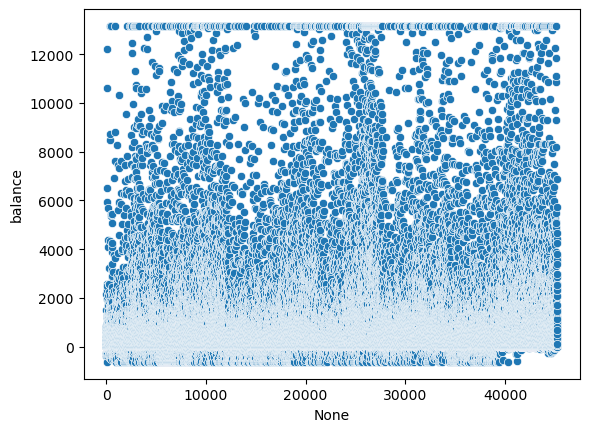

In [587]:
sns.scatterplot(y = data['balance'], x = data['balance'].index )

In [588]:
data['balance'].describe()

count    45211.000000
mean      1278.122691
std       2249.412265
min       -627.000000
25%         72.000000
50%        448.000000
75%       1428.000000
max      13165.000000
Name: balance, dtype: float64

In [589]:
data['balance'].quantile(0.11)

0.0

In [590]:
shift_constant = abs(data['balance'].min()) + 1  # Ensure all values > 0
bal1 = data['balance'] + shift_constant

In [591]:
bal_resip =  pd.Series(1 / bal1, name='Col1')
bal_log =  pd.Series(np.log(bal1), name='Col2')
bal_sq =  pd.Series(bal1 ** 2, name='Col3')
bal_cube = pd.Series(bal1 ** 3, name='Col4')
bal_sqrt = pd.Series(np.sqrt(bal1), name='Col5')
bal_cubert = pd.Series(np.cbrt(bal1), name='Col6')
bal_sin = pd.Series(np.sin(bal1), name='Col7')
bal_cos = pd.Series(np.cos(bal1), name='Col8')
x1= [bal1,bal_resip,bal_log,bal_sq,bal_cube,bal_sqrt,bal_cubert,bal_sin,bal_cos]

In [592]:
df1 = pd.concat(x1, axis=1)
df1

,balance,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8
0,2771,0.000361,7.926964,7678441,21276960011,52.640289,14.045769,0.115024,0.993363
1,657,0.001522,6.487684,431649,283593393,25.632011,8.693376,-0.395981,-0.918259
2,630,0.001587,6.445720,396900,250047000,25.099801,8.572619,0.993882,-0.110447
3,2134,0.000469,7.665753,4553956,9718142104,46.195238,12.874533,-0.756921,-0.653507
4,629,0.001590,6.444131,395641,248858189,25.079872,8.568081,0.629935,0.776648
...,...,...,...,...,...,...,...,...,...
45206,1453,0.000688,7.281386,2111209,3067586677,38.118237,11.326312,0.999910,-0.013397
45207,2357,0.000424,7.765145,5555449,13094193293,48.548944,13.308217,0.721184,0.692744
45208,6343,0.000158,8.755107,40233649,255202035607,79.642953,18.511072,-0.124112,-0.992268
45209,1296,0.000772,7.167038,1679616,2176782336,36.000000,10.902724,0.995676,-0.092896


In [593]:
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
X = df1# Features
y = data['y'] # Target

# Select the top 2 features
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]  
print("Selected features:", selected_features.tolist())     ## Gives "Log Transformation" as best feature.

Selected features: ['Col2', 'Col5', 'Col6']


In [594]:
data['duration'].describe()

count    45211.000000
mean       254.375993
std        234.779511
min         11.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       1269.000000
Name: duration, dtype: float64

In [595]:
due_resip =  pd.Series(1 / data['duration'], name='Col1')
due_log =  pd.Series(np.log(data['duration']), name='Col2')
due_sq =  pd.Series(data['duration'] ** 2, name='Col3')
due_cube = pd.Series(data['duration'] ** 3, name='Col4')
due_sqrt = pd.Series(np.sqrt(data['duration']), name='Col5')
due_cubert = pd.Series(np.cbrt(data['duration']), name='Col6')
due_sin = pd.Series(np.sin(data['duration']), name='Col7')
due_cos = pd.Series(np.cos(data['duration']), name='Col8')
x2= [data['duration'],due_resip,due_log,due_sq,due_cube,due_sqrt,due_cubert,due_sin,due_cos]

<Axes: xlabel='Col5', ylabel='Density'>

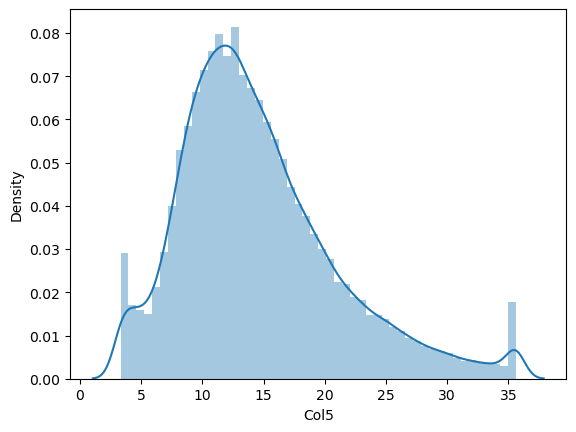

In [596]:
sns.distplot(due_sqrt, kde = True)

In [597]:
df2 = pd.concat(x2, axis=1)

In [598]:
X = df2# Features
y = data['y']  # Target

# Select the top 2 features
selector = SelectKBest(score_func=f_classif, k=3)
X_new = selector.fit_transform(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())  ## Gives "Duration" as best feature.

Selected features: ['duration', 'Col5', 'Col6']


In [599]:
data.loc[data['age'] < 30,'age'].count()

5273

Bin 1: Range 23.0 to 31.0
Bin 2: Range 31.0 to 39.0
Bin 3: Range 39.0 to 47.0
Bin 4: Range 47.0 to 55.0
Bin 5: Range 55.0 to 63.0
Bin 6: Range 63.0 to 71.0


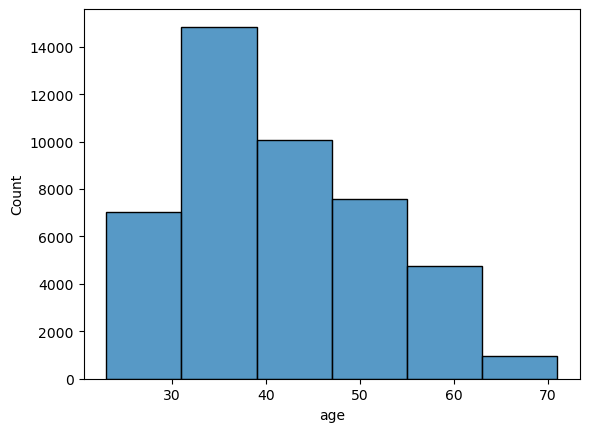

In [600]:
# Plot the distribution
plot = sns.histplot(data['age'], bins=6)

# Get bin edges using numpy.histogram
counts, bin_edges = np.histogram(data['age'], bins=6)

# Print bin edges
for i in range(len(bin_edges) - 1):
    print(f"Bin {i + 1}: Range {bin_edges[i]} to {bin_edges[i + 1]}")

plt.show()

In [601]:
data['Age_Binned'] = pd.cut(data['age'], bins=[23, 31, 39, 47, 55, 71], labels=['A1', 'A2', 'A3', 'A4', 'A5'])
print(data.head())

   age  balance housing  day  duration  campaign   y  job_admin.  \
0   58     2143       1    5       261         1  no           0   
1   44       29       1    5       151         1  no           0   
2   33        2       1    5        76         1  no           0   
3   47     1506       1    5        92         1  no           0   
4   33        1       0    5       198         1  no           0   

   job_blue-collar  job_management  job_other1  job_other2  job_retired  \
0                0               1           0           0            0   
1                0               0           0           0            0   
2                0               0           1           0            0   
3                1               0           0           0            0   
4                0               0           1           0            0   

   job_services  job_technician  marital_divorced  marital_married  \
0             0               0                 0                1   


Bin 1: Range 1.0 to 8.5
Bin 2: Range 8.5 to 16.0
Bin 3: Range 16.0 to 23.5
Bin 4: Range 23.5 to 31.0


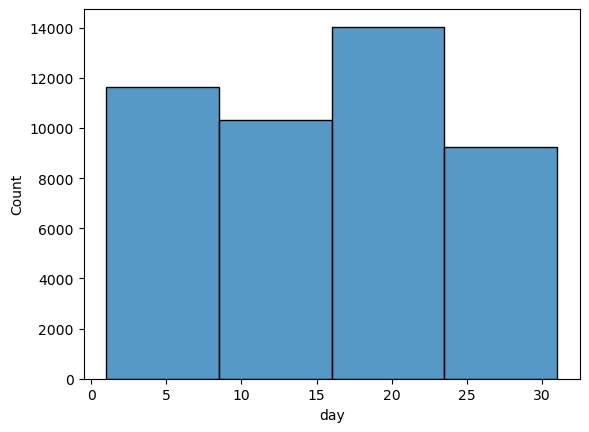

In [602]:
# Plot the distribution
plot = sns.histplot(data['day'], bins=4)

# Get bin edges using numpy.histogram
counts, bin_edges = np.histogram(data['day'], bins=4)

# Print bin edges
for i in range(len(bin_edges) - 1):
    print(f"Bin {i + 1}: Range {bin_edges[i]} to {bin_edges[i + 1]}")

plt.show()

In [603]:
data['day_Binned'] = pd.cut(data['day'], bins=[1, 8, 15, 22, 31], labels=['W1', 'W2', 'W3', 'W4'])
print(data.head())

   age  balance housing  day  duration  campaign   y  job_admin.  \
0   58     2143       1    5       261         1  no           0   
1   44       29       1    5       151         1  no           0   
2   33        2       1    5        76         1  no           0   
3   47     1506       1    5        92         1  no           0   
4   33        1       0    5       198         1  no           0   

   job_blue-collar  job_management  job_other1  job_other2  job_retired  \
0                0               1           0           0            0   
1                0               0           0           0            0   
2                0               0           1           0            0   
3                1               0           0           0            0   
4                0               0           1           0            0   

   job_services  job_technician  marital_divorced  marital_married  \
0             0               0                 0                1   


In [604]:
data2 = data.copy(deep = True)

In [605]:
day_col = pd.get_dummies(data['day_Binned'], prefix= 'week', dtype=int)

data.drop(['day_Binned','day'], axis=1, inplace= True)

data = pd.concat([data,day_col], axis=1)

In [606]:
day_col = pd.get_dummies(data['Age_Binned'], prefix= 'age', dtype=int)

data.drop(['Age_Binned','age'], axis=1, inplace= True)

data = pd.concat([data,day_col], axis=1)

In [607]:
data['balance'] = bal_log

In [608]:
data['housing'] = data['housing'].astype(int)

In [609]:
data.loc[data['y'] == 'no' ,'y'] = 0
data.loc[data['y'] =='yes' ,'y'] = 1

data['y'] = data['y'].astype(int)

In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   balance            45211 non-null  float64
 1   housing            45211 non-null  int32  
 2   duration           45211 non-null  int64  
 3   campaign           45211 non-null  int64  
 4   y                  45211 non-null  int32  
 5   job_admin.         45211 non-null  int32  
 6   job_blue-collar    45211 non-null  int32  
 7   job_management     45211 non-null  int32  
 8   job_other1         45211 non-null  int32  
 9   job_other2         45211 non-null  int32  
 10  job_retired        45211 non-null  int32  
 11  job_services       45211 non-null  int32  
 12  job_technician     45211 non-null  int32  
 13  marital_divorced   45211 non-null  int32  
 14  marital_married    45211 non-null  int32  
 15  marital_single     45211 non-null  int32  
 16  edu_primary        452

In [611]:
data.head()

,balance,housing,duration,campaign,y,job_admin.,job_blue-collar,job_management,job_other1,job_other2,job_retired,job_services,job_technician,marital_divorced,marital_married,marital_single,edu_primary,edu_secondary,edu_tertiary,edu_unknown,contact_cellular,contact_telephone,contact_unknown,month_Q1,month_Q2,month_Q3,month_Q4,week_W1,week_W2,week_W3,week_W4,age_A1,age_A2,age_A3,age_A4,age_A5
0,7.926964,1,261,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
1,6.487684,1,151,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
2,6.445720,1,76,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0
3,7.665753,1,92,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
4,6.444131,0,198,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0


## >>>DataSet Split into Train - Test<<<

In [612]:
#### Since its a classification problem, converting target column into 0/1s #####

X = data.drop(['y'],axis=1)

y = data['y']

In [613]:
X.shape, y.shape

((45211, 35), (45211,))

In [614]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [615]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [616]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 35), (9043, 35), (36168,), (9043,))

In [617]:
y_train.value_counts()

y
0    31937
1     4231
Name: count, dtype: int64

## Modeling --> Import Model Liberaries

In [632]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib


#Hyperparameter tuning 

from sklearn.model_selection import GridSearchCV


#Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

## LOGISTIC REGRESSION MODEL

In [645]:
#modeling Logistic regression
log_reg = LogisticRegression(random_state=29, C= 0.1, max_iter= 200, penalty = 'l2', solver=  'sag')
log_reg.fit(X_train, y_train)

#prediction
log_train_pred = log_reg.predict(X_train)
log_test_pred = log_reg.predict(X_test)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_cv = cross_val_score(log_reg, X, y, cv=stratified_kfold, scoring="accuracy").mean()

#evaluation metrics
print("Train Accuracy :", accuracy_score(y_train, log_train_pred))
print("Test Accuracy :", accuracy_score(y_test, log_test_pred))
print("Log_CV_Score :", log_cv)
print("===============================================================")
classification_report_logreg = classification_report(y_test, log_test_pred)
print(classification_report_logreg)

Train Accuracy : 0.8924740101747402
Test Accuracy : 0.8877584872276899
Log_CV_Score : 0.8882129895106823
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.55      0.23      0.33      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.89      0.87      9043



#### Hyperparameter Tuning

In [643]:
log_reg = LogisticRegression(random_state=29)
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'penalty':['l1','l2'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter':[200]
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_grid =grid_search.best_params_
print("Best Grid:",best_grid) 

Best Grid: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}


## K-NearestNeighbors

In [652]:
knn_model = KNeighborsClassifier(n_neighbors=23, metric='euclidean')
knn_model.fit(X_train, y_train)


#prediction
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
knn_cv = cross_val_score(knn_model, X, y, cv=stratified_kfold, scoring="accuracy", n_jobs=-1).mean()

#evaluation metrics
print("Train Accuracy :", accuracy_score(y_train, knn_train_pred))
print("Test Accuracy :", accuracy_score(y_test, knn_test_pred))
print("KNN_CV_Score :", knn_cv)
print("===============================================================")
classification_report_knn = classification_report(y_test, knn_test_pred)
print(classification_report_knn)

Train Accuracy : 0.889349701393497
Test Accuracy : 0.885104500718788
KNN_CV_Score : 0.886598341630221
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7985
           1       0.58      0.07      0.12      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.53      0.53      9043
weighted avg       0.85      0.89      0.84      9043



#### Hyperparameter Tuning

In [648]:
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,71)),
    'metric': ['euclidean', 'manhattan', 'minkowski']
             }
cv_classifier = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
cv_classifier.fit(X_train, y_train)
best_param = cv_classifier.best_params_
print("Best Param: ", best_param)

Best Param:  {'metric': 'euclidean', 'n_neighbors': 23}


## SVM > Support Vector Machine

In [659]:
#SVM Modeling
svm_model = SVC(random_state=27, C=0.1, kernel='rbf')
svm_model.fit(X_train, y_train)

#prediction
svm_train_pred = svm_model.predict(X_train)
svm_test_pred = svm_model.predict(X_test)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_cv = cross_val_score(svm_model, X, y, cv=stratified_kfold, scoring="accuracy", n_jobs=-1).mean()

#evaluation metrics
print("Train Accuracy :", accuracy_score(y_train, svm_train_pred))
print("Test Accuracy :", accuracy_score(y_test, svm_test_pred))
print("SVM_CV_Score :", svm_cv)
print("===============================================================")
classification_report_svm = classification_report(y_test, svm_test_pred)
print(classification_report_svm)

Train Accuracy : 0.8865848263658482
Test Accuracy : 0.8854362490324007
SVM_CV_Score : 0.8888101927327332
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7985
           1       0.68      0.04      0.07      1058

    accuracy                           0.89      9043
   macro avg       0.79      0.52      0.51      9043
weighted avg       0.86      0.89      0.84      9043



#### Hyperparameter Tuning

In [660]:
svm_model = SVC(random_state=27,)
param_grid = {'kernel' : ['linear', 'poly', 'sigmoid', 'rbf']}
svm_grid = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'kernel': 'rbf'}

## Decision Tree

In [661]:
dt_model = DecisionTreeClassifier(random_state=25, criterion="entropy", max_depth=5)
dt_model.fit(X_train, y_train)

#prediction
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv = cross_val_score(dt_model, X, y, cv=stratified_kfold, scoring="accuracy", n_jobs=-1).mean()

#evaluation metrics
print("Train Accuracy :", accuracy_score(y_train, dt_train_pred))
print("Test Accuracy :", accuracy_score(y_test, dt_test_pred))
print("Decision_Tree_CV_Score :", dt_cv)
print("===============================================================")
classification_report_dt = classification_report(y_test, dt_test_pred)
print(classification_report_dt)

Train Accuracy : 0.8942435301924353
Test Accuracy : 0.8874267389140772
Decision_Tree_CV_Score : 0.8904469302616516
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7985
           1       0.53      0.29      0.38      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043



#### Hyperparameter Tuning

In [662]:
dt_model = DecisionTreeClassifier(random_state=25)
param_grid = {'criterion' : ["ginni", "entropy", "log_loss"], "max_depth" : list(range(1,81))}
dt_grid = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, n_jobs=-1)
dt_grid.fit(X_train, y_train)
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

## Random Forest

In [682]:
#Random Forest Modeling
rf_model = RandomForestClassifier(random_state=24,
                                  ccp_alpha=0.001,
                                  max_depth=None,
                                  n_estimators=100)
rf_model.fit(X_train, y_train)

#prediction
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_cv = cross_val_score(rf_model, X, y, cv=stratified_kfold, scoring="accuracy", n_jobs=-1).mean()

#evaluation metrics
print("Train Accuracy :", accuracy_score(y_train, rf_train_pred))
print("Test Accuracy :", accuracy_score(y_test, rf_test_pred))
print("Random_Forest_CV_Score :", rf_cv)
print("===============================================================")
classification_report_rf = classification_report(y_test, rf_test_pred)
print(classification_report_rf)

Train Accuracy : 0.8830181375801813
Test Accuracy : 0.8830034280659074
Random_Forest_CV_Score : 0.8830151956773266
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7985
           1       0.00      0.00      0.00      1058

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.78      0.88      0.83      9043



#### Hyperparamater Tuning

In [678]:
rf_model = RandomForestClassifier(random_state=24)
param_grid = {'n_estimators' : [100, 200, 300,],
              'ccp_alpha':[0.001, 0.01],
              'max_depth': [None, 10, 20, 30]}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("GridSearch:", rf_grid_search.best_params_)

GridSearch: {'ccp_alpha': 0.001, 'max_depth': None, 'n_estimators': 100}


## XGB >> Xtreme Gradient Boost Classifier

In [683]:
#XGBoost Modeling

xgb_model = XGBClassifier(random_state=23, 
                          learning_rate=0.1, 
                          n_estimators=200, 
                          subsample=1.0,
                          max_depth=20,
                          colsample_bytree=0.7)

xgb_model.fit(X_train, y_train)

#prediction
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
# xgb_cv = cross_val_score(xgb_model, X, y, cv=5, scoring="accuracy", n_jobs=-1).mean()

#evaluation metrics
print("Train Accuracy :", accuracy_score(y_train, xgb_train_pred))
print("Test Accuracy :", accuracy_score(y_test, xgb_test_pred))
# print("XGBoost_CV_Score :", xgb_cv)
print("===============================================================")
classification_report_xgb = classification_report(y_test, xgb_test_pred)
print(classification_report_xgb)

Train Accuracy : 1.0
Test Accuracy : 0.8875373216852814
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7985
           1       0.53      0.34      0.41      1058

    accuracy                           0.89      9043
   macro avg       0.72      0.65      0.68      9043
weighted avg       0.87      0.89      0.88      9043



#### Hyperparameter Tuning

## Model Selection

In [684]:
final_model = pd.DataFrame({"Models" : ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'XGBoost'], 
            "Train_Acc_Score" : [accuracy_score(y_train, log_train_pred), 
                                accuracy_score(y_train, knn_train_pred),
                                accuracy_score(y_train, svm_train_pred), 
                                accuracy_score(y_train, dt_train_pred), 
                                accuracy_score(y_train, rf_train_pred),
                                accuracy_score(y_train, xgb_train_pred)],
            "Test_Acc_score": [ accuracy_score(y_test, log_test_pred),
                               accuracy_score(y_test, knn_test_pred), 
                               accuracy_score(y_test, svm_test_pred), 
                               accuracy_score(y_test, dt_test_pred), 
                               accuracy_score(y_test, rf_test_pred), 
                               accuracy_score(y_test, xgb_test_pred)],
            "CV_Score" : [log_cv,
                          knn_cv,
                          svm_cv,
                          dt_cv,
                          rf_cv,
                          np.nan]})

In [685]:
final_model

,Models,Train_Acc_Score,Test_Acc_score,CV_Score
0,Logistic Regression,0.892474,0.887758,0.888213
1,KNN,0.889350,0.885105,0.886598
2,SVM,0.886585,0.885436,0.888810
3,Decision Tree,0.894244,0.887427,0.890447
4,Random Forest,0.883018,0.883003,0.883015
5,XGBoost,1.000000,0.887537,NaN


The best classifier model here among all models is Logistic Regression Classifier. It did prediction with 89% of accuracy.

In [686]:
import joblib

# Define a dictionary with model names as keys
models = {
    'log_reg': log_reg,
    'knn_model': knn_model,
    'svm_model': svm_model,
    'dt_model': dt_model,
    'rf_model': rf_model,
    'xgb_model': xgb_model
}

# Save each model using its name
for name, model in models.items():
    joblib.dump(model, f'{name}.pkl')